## Exercise 1 | Working with geospatial data (GIS)

To get at least a bit familiar with [GIS](https://en.wikipedia.org/wiki/Geographic_information_system) data and the concept of map projections, we’ll do a simple task of plotting two data sets that are given in different coordinate systems.

1. Download the [world_m.zip](https://github.com/HY-TKTL/intro-to-data-science-2017/blob/master/world_m.zip) and [cities.zip](https://github.com/HY-TKTL/intro-to-data-science-2017/blob/master/cities.zip) files that each include a set of GIS files. Most notably, the <span style="background-color: #c177f2">shp</span> files are [Shapefile-files](https://en.wikipedia.org/wiki/Shapefile) with coordinates (don’t look, it’s binary!). The <span style="background-color: #c177f2">prj</span> files contain information (in plain text, so okay to look) about the coordinate systems. Open the files using your favorite programming environment and packages.  

    <span style="background-color: #c177f2"> *Hint: We warmly recommend [Geopandas](http://geopandas.org/) for pythonistas.*</span>

In [1]:
import geopandas as gpd

worlddata = gpd.read_file("world_m/world_m.shp")
citiesdata = gpd.read_file("cities/cities.shp")

2. The <span style="background-color: #c177f2">world_m</span> file contains borders of almost all countries in the world. Plot the world.

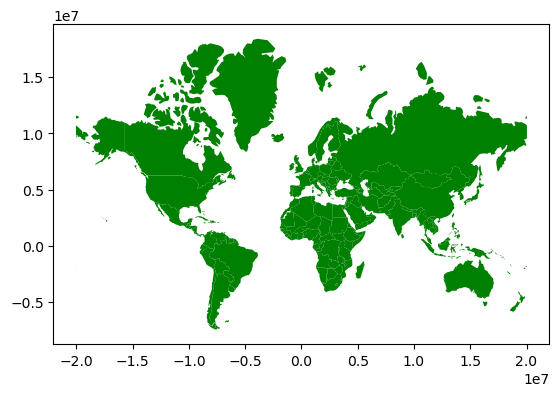

In [2]:
worlddata.head()
# plot the world map
worldmap = worlddata.plot(color='green')

3. On top of the countries that you just plotted, plot another layer of information, namely the capital cities of each country from the <span style="background-color: #c177f2">cities</span> dataset. However, depending on how clever your programming environment is, the cities will probably all appear to be in the Gulf of Guinea, near the coordinates (0°, 0°).

<AxesSubplot: >

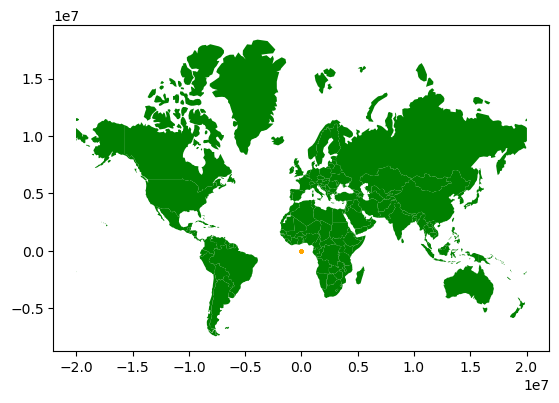

In [4]:
# need the world map in the same cell 
# so I have something to attach the cities to
worldmap = worlddata.plot(color='green')

# ax = base map
citiesdata.plot(ax=worldmap, marker='o', markersize=2, color='orange')

4. Perform a map projection to bring the two data-sets into a shared coordinate system. (You can choose which one.) Now plot the two layers together to make sure the capital cities are where they are supposed to be.

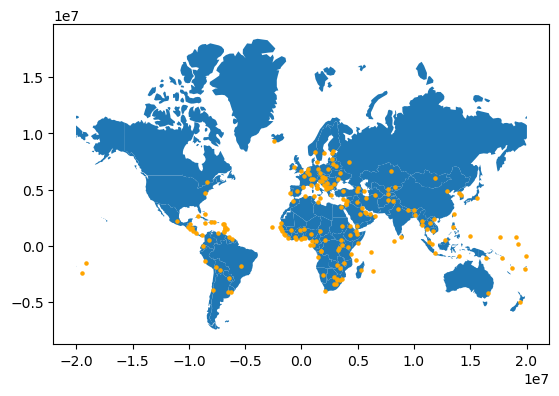

In [5]:
# now we change the cities coordinate system 
# https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_crs.html
# https://spatialreference.org/
# 3395 = mercator (typical)
cities_mercator = citiesdata.to_crs(epsg=3395)
worldmap = worlddata.plot()

cities_mercator.plot(ax=worldmap, marker='o', color='orange', markersize=5);

In [6]:
# interactive visualization of mapping cities on map 
# and displaying all data given in the city df 
cities_mercator.explore()
cities_start_with_W = cities_mercator['name'].str[0]=='V'

# filter based on cities starting with W
# i.e. filtering gender or location
cities_mercator[cities_start_with_W].explore(cmap="Blues")  

# filtering date --> streamlit 
cities_mercator.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      202 non-null    object  
 1   geometry  202 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 3.3+ KB


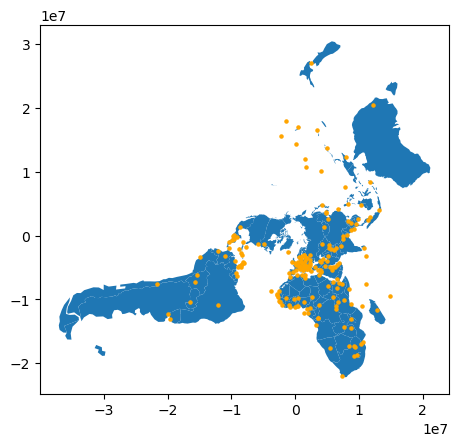

In [7]:
# alternatively we can change both to a different system
# like Arctic Polar Stereographic - EPSG = 2805
world = worlddata.to_crs(epsg=3995)
cities = citiesdata.to_crs(epsg=3995)
worldmap = world.plot()

cities.plot(ax=worldmap, marker='o', color='orange', markersize=5);

**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Symbol classification

We’ll be looking into machine learning by checking out the [HASYv2](https://zenodo.org/record/259444#.Wb7efZ8xDhZ) dataset that contains hand written mathematical symbols as images. The whole dataset is quite big, so we’ll restrict ourselves to doing 10-class classification on some of the symbols. Download the data and complete the following tasks.

1. Extract the data and find inside a file called <span style="background-color: #c177f2">hasy-data-labels.csv</span>. This file contains the labels for each of the images in the <span style="background-color: #c177f2">hasy_data</span> folder. Read the labels in and only keep the rows where the <span style="background-color: #c177f2">symbol_id</span> is within the inclusive range <span style="background-color: #c177f2">[70, 80]</span>. Read the corresponding images as black-and-white images and flatten them so that each image is a single vector of shape <span style="background-color: #c177f2">32x32 = 1024</span>. Your dataset should now consist of your input data of shape <span style="background-color: #c177f2">(1020, 1024)</span> and your labels of shape <span style="background-color: #c177f2">(1020, )</span>. That is, a matrix of shape <span style="background-color: #c177f2">1020 x 1024</span> and a vector of size <span style="background-color: #c177f2">1020</span>.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci

#load datasets
hasydf = pd.read_csv('HASYv2/hasy-data-labels.csv')

# only keep rows where symbol_id is within [70, 80]
inclusiverange = hasydf[(hasydf['symbol_id']>=70) & (hasydf['symbol_id']<=80)]

In [9]:
# read as black-and-white images, flatten to shape 32x32=1024
data = []
target_data = []
# import matplotlib.pyplot as plt
import cv2


# Iterate over df rows as (index, Series) pairs.
for index, row in inclusiverange.iterrows():
    # flatten image to bw and put into data
    bwimage = cv2.imread(str('HASYv2/'+row['path']), cv2.IMREAD_GRAYSCALE)
    # single vector of shape 32x32 = 1024
    # TO DO THE ABOVE 
    bwimage= bwimage.flatten()
    data.append(bwimage)
    # put target classification into target_data
    target_data.append(row['latex'])

In [10]:
print(data[2].shape, len(data))
print(target_data[0], len(target_data))



(1024,) 1020
0 1020


2. Shuffle the data, and then split it into training and test sets, using the first 80% of the data for training and the rest for evaluation.

In [11]:
from sklearn.model_selection import train_test_split # splits data into trainx, trainy, testx, testy


# split into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(data, target_data, train_size=0.8, shuffle=True)
len(X_train), len(Y_train)

(816, 816)

3. Fit a logistic regression classifier on the data. Note that we have a multi-class classification problem, but logistic regression is a binary classifier. For this reason, you will find useful <span style="background-color: #c177f2">[Sklearn's "multi_class" attribute](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)</span>. Use a multinomial loss and the softmax function to predict the probability of each class as the outcome.  The classifier should select the class with the highest probability. Most library implementations will do this for you - feel free to use one.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

logRegressionModel = LogisticRegression(multi_class='multinomial')

classificiation = logRegressionModel.fit(X_train, Y_train)

/Users/citlalitrigos/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4. In order to evaluate the model, let’s create our own naive classifier that simply guesses the most common class in the training set (looking at the test set here would be cheating!). Then, evaluate your logistic regression model on the test data, and compare it to the majority class classifier. The logistic regression model should have significantly better accuracy as the naive model is merely making a guess.

    <span style="background-color: #c177f2"> *Hint: Sklearn's DummyClassifier( ) might save you a bit of time.*</span>

In [13]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummyClassifier = DummyClassifier()

# fit the training data
dummyClassifier.fit(X_train, Y_train)

# test on the testing data!
predicted = classificiation.predict(X_test)
predictedDummy = dummyClassifier.predict(X_test)

# print the real data and the predictions
print("Real Data: \n", Y_test)
print("\nMulticlass classificiation: \n",predicted )
print("\nDummy classification: \n", predictedDummy)

# calculate accuracy
print("\nAccuracy of multiclass: ", accuracy_score(Y_test,predicted))
print("\nAccuracy of dummy: ", accuracy_score(Y_test,predictedDummy))

Real Data: 
 ['8', '1', '6', '6', '2', '7', '9', '8', '7', '2', '2', '6', '8', '8', '4', '0', '0', '3', '0', '2', '8', '6', '6', '5', '9', '1', '8', '1', '8', '9', '2', '1', '2', '9', '9', '1', '4', '7', '1', '0', '3', '8', '5', '2', '7', '5', '4', '7', '1', '3', '7', '5', '2', '1', '0', '7', '2', '0', '1', '0', '1', '3', '2', '0', '4', '1', '8', '9', '0', '6', '0', '5', '0', '3', '8', '5', '0', '3', '6', '1', '2', '0', '1', '9', '9', '7', '0', '5', '6', '5', '3', '8', '7', '1', '0', '9', '7', '3', '2', '1', '5', '7', '0', '0', '6', '0', '8', '6', '0', '6', '1', '8', '0', '8', '6', '2', '9', '2', '8', '6', '3', '4', '2', '8', '7', '8', '5', '0', '4', '1', '6', '8', '7', '2', '2', '1', '1', '2', '2', '2', '8', '3', '5', '1', '1', '6', '9', '9', '0', '4', '1', '3', '8', '9', '0', '2', '0', '9', '8', '2', '3', '8', '6', '1', '9', '3', '3', '1', '9', '8', '4', '2', '9', '3', '5', '6', '8', '1', '9', '7', '3', '4', '1', '2', '1', '1', '1', '3', '3', '8', '4', '3', '7', '4', '0', '1', '5', '

5. Plot some of the images that the logistic classifier misclassified. Can you think of an explanation why they were misclassified? Would you have gotten them right?
    
    <span style="background-color: #c177f2">*Hint: Scipy has a [function](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.misc.imshow.html) that can help you with plotting.*</span>

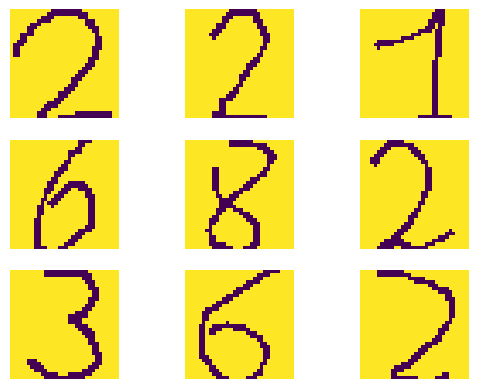

In [14]:
# start a plot with a few squares
fig = plt.figure(9)
# set index for the square we will fill in 
k = 1

# loop through the results
for i in range(len(Y_test)):
    # if a bad prediction
    if predicted[i] != Y_test[i]:
        # reshape the png from 1024 back to (32,32)
        png = X_train[i].reshape((32,32))
        # plot it in the kth index of our 9x9
        square = plt.subplot(3,3,k)
        # remove axis bs aesthetics
        square.set_axis_off()
        # show it
        plt.imshow(png)
        # view only 9
        k+=1
        if k==10: 
            break

Maybe the prediction has to do with the fact that these all touch the edges. To test, let's print out 9 of the ones that were correctly identified:

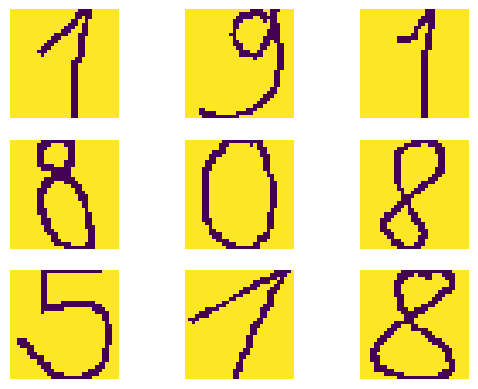

In [15]:
# start a plot with a few squares
fig = plt.figure(9)
# set index for the square we will fill in 
k = 1

# loop through the results
for i in range(len(Y_test)):
    # if a bad prediction
    if predicted[i] == Y_test[i]:
        # reshape the png from 1024 back to (32,32)
        png = X_train[i].reshape((32,32))
        # plot it in the kth index of our 9x9
        square = plt.subplot(3,3,k)
        # remove axis bs aesthetics
        square.set_axis_off()
        # show it
        plt.imshow(png)
        # view only 9
        k+=1
        if k==10: 
            break

Clearly these are all touching the edges. So, I'm not sure why the incorrectly identified ones weren't identified. 🤪

Here are some examples of the syntax used to fit a logistic regression classifier (using Sklearn or statsmodel with Python, or GLM with R):

In [9]:
#Sklearn (python)

#from sklearn.linear_model import LogisticRegression

#Fit on the training data set, with:
#X : {array-like, sparse matrix}, shape (n_samples, n_features) , n_samples rows x n_features columns
#with attributes that describe each sample.
#y : array-like, shape (n_samples,) , n_samples target values for each sample.

#model = LogisticRegression()
#model.fit(X, y) 

In [10]:
#Statsmodels (python)

#import statsmodels.api as sm
#model = sm.Logit(y, X)

In [11]:
#GLM (R)

#model <- glm(y ~.,family=binomial(link='logit'), data=X) 

In [12]:
# Use this cell for your code

**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**